In [1]:
# Importēt palīgfunkcijas un bibliotēkas

from helpers import parse_gz_files, top_10_predicates

In [2]:
# Iegūt četriniekus klasei Hospital 2021., 2020. un 2019. gadu datu kopās

hospital_quads = {}
hospital_quads["2019"] = parse_gz_files(["../hospital_2019.gz"], "Hospital")
hospital_quads["2020"] = parse_gz_files(["../hospital_2020.gz"], "Hospital")
hospital_quads["2021"] = parse_gz_files(["../hospital_2021.gz"], "Hospital")


Top 10 predikāti 2019:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 140947 100.0%
<http://schema.org/Hospital/image> 78978 56.03%
<http://schema.org/Physician/hospitalAffiliation> 8836 6.27%
<http://schema.org/Hospital/url> 6278 4.45%
<http://www.w3.org/1999/xhtml/microdata#item> 3728 2.64%
<http://schema.org/Hospital/name> 2804 1.99%
<http://schema.org/Physician/mainEntityOfPage> 1982 1.41%
<http://schema.org/Hospital/legalName> 982 0.7%
<http://schema.org/Hospital/address> 914 0.65%
<http://schema.org/Review/itemReviewed> 865 0.61%


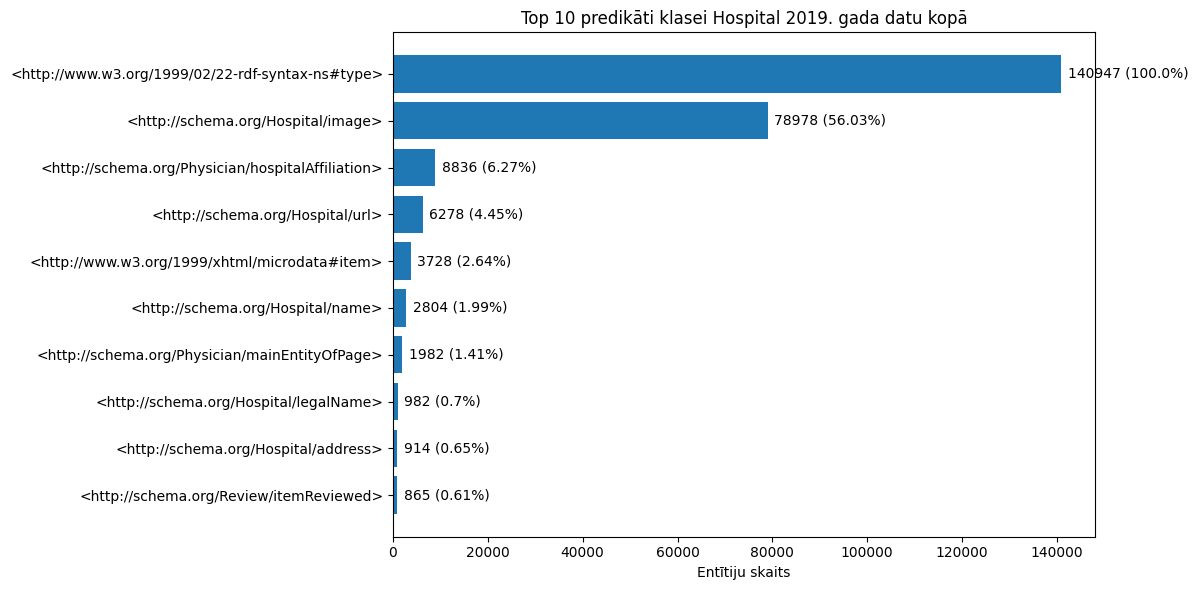


Top 10 predikāti 2020:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 271513 100.0%
<http://schema.org/address> 160951 59.28%
<http://schema.org/image> 118107 43.5%
<http://schema.org/name> 112944 41.6%
<http://schema.org/telephone> 87015 32.05%
<http://schema.org/url> 76898 28.32%
<http://schema.org/priceRange> 55277 20.36%
<http://schema.org/hasMap> 46324 17.06%
<http://www.w3.org/1999/xhtml/microdata#item> 17890 6.59%
<http://schema.org/legalName> 17536 6.46%


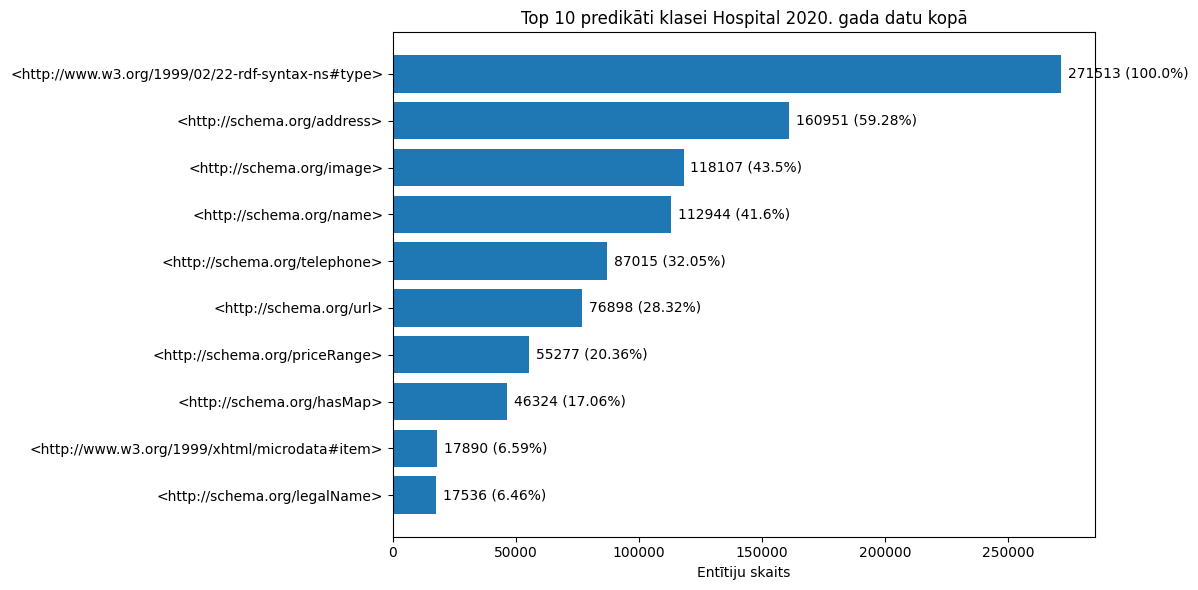


Top 10 predikāti 2021:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 423294 100.0%
<http://schema.org/address> 296344 70.01%
<http://schema.org/image> 275921 65.18%
<http://schema.org/telephone> 184070 43.49%
<http://schema.org/url> 176559 41.71%
<http://schema.org/name> 95713 22.61%
<http://schema.org/priceRange> 85961 20.31%
<http://schema.org/hasMap> 59942 14.16%
<http://schema.org/logo> 41856 9.89%
<http://schema.org/geo> 40612 9.59%


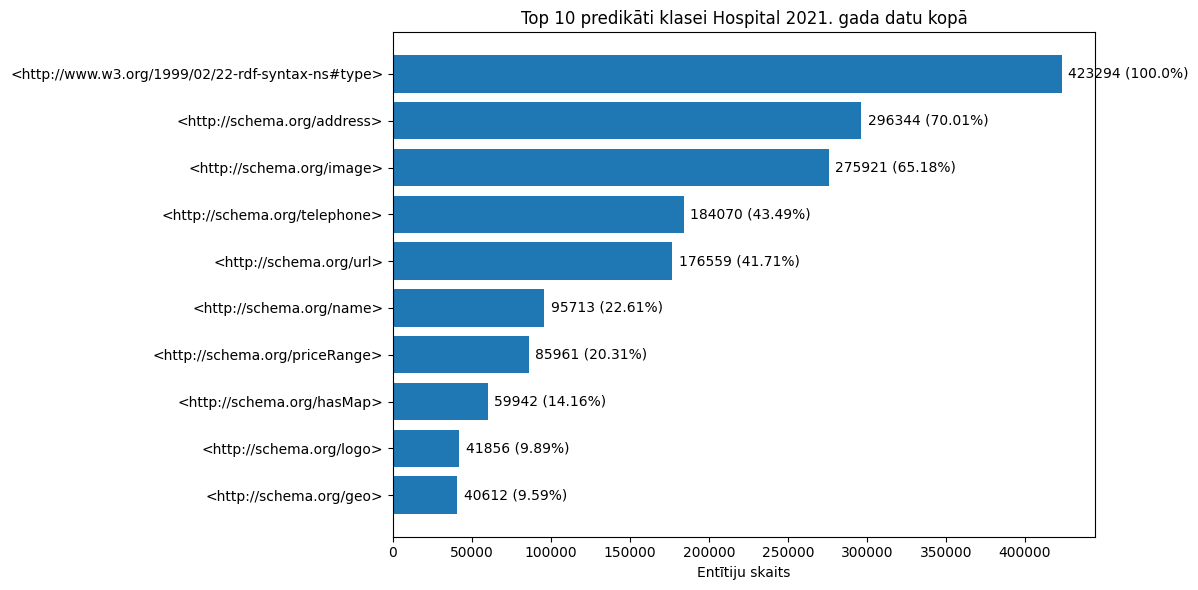

In [4]:
top_10_predicates(hospital_quads, 'Hospital')